# **Considerações**

3. Descrever mellhor 
6. Retira os autlais
7. Explicar porque da Normalização em vez da padronização
8. Fazer um pré-processamento mais atencioso(Considerar tratamento de outliers, normalizações, categorizações etc)
9. Análise do problema de acordo com alguma métrica conectada ao négocio (Análise FP vs Fn, matriz de custo etc)

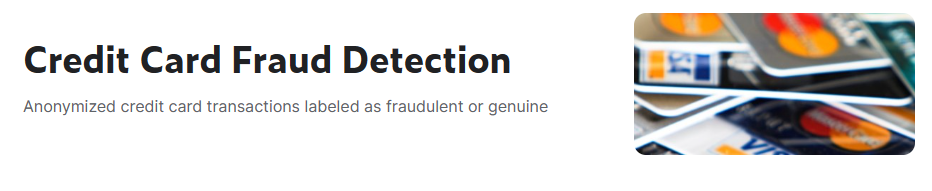

# Objetivo
Esse notebook e destinado a criação de um modelo de previsão para fraude em cartões de crétidos, Os dados utilizados nesse notebook estão disponíveis no [Kaggle](https://www.kaggle.com/) na página [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud). Compete desenvolvemos um sistema de classificação binário com intuito de informa se determinada transação financeira realizada se mostra fraudulentas por meio da base de dados disponível na página do desafio.

# Bibliotecas

In [1]:
import numpy as np
import pandas as pd

In [2]:
print(f'Versão pandas: {pd.__version__}')
print(f'Versão numpy: {np.__version__}')

Versão pandas: 1.5.2
Versão numpy: 1.24.1


# Importação dos dados

In [3]:
#Caminho dos dados 
push = "C:\\Users\\Mickael\\OneDrive\\Projetos\\Ideias\\dados\\Fraude\\creditcard.csv"

#DataFrame
dados = pd.read_csv(push)
dados

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
#Tamanho dos dados
dados.shape #(Número de linhas, Número de colunas)

(284807, 31)

Em `Class` temos a representação dos tipos de transações no cartão de crétido, sendo classificadas bináriamente da seguinte forma:
>0 - **Para transações não fraudulentas**  
>1 - **Para transações fradulentas**

In [5]:
#Contagem de valores absolutos
dados["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
#Contagem dos valores em percentuais
dados["Class"].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

De acordo com as informações geradas pelas células de códigos anteriores podemos concluir que 99,83% de todas as transações apresentadas não são fraudulentas a outra pequena parcela 0,17% delas são consideradas fraudulentas. A frequência entre as duas classes e enorme, quando temos um diferença elevada em duas ou mais classes nos dados dizemos que eles são desbalanceados. O desequilíbrio entre as classes poder acarrenta em um resultado inviesado dos modelos propostos.  

Chamanos de classe majoritária aquela que apresenta a maior quantidade de dados, as transações não fraudulentas, e classe minoritária, as transações fraudulentas, aquela que apresenta a menor quantidade de dados.

In [7]:
#Verificando a existência de dados null
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Transformandos os dados
Realizando um transformção nos dados para um manipulação mais eficiente dos modelos que serão testados, realizaremos duas transformações:
>1.**Padronização**: Sendo $X$ o valor que será transfornado, $\mu$ a média e $\sigma$ o desvio padrão dos dados, a padronização do valor $X$ será dados por:

<center>$z = \displaystyle\frac{X - \mu}{\sigma}$<center>

Onde o valor $z$ é chamado de z-score.

>2.**Normalização**: Sendo $X$ o valor que será transformado, $X_{Min}$ o menor valor da série dos dados e $X_{Max}$ o maior valor da série de dados, a normalização do valor $X$ será dado por:
    
<center>$X^{'}=\displaystyle\frac{X-X_{Min}}{X_{Max}-X_{Min}}$<center>

In [8]:
#Array com os nomes da colunas do DataFrame dados
colunas = dados.columns.values

#Array com os nomes das 30 colunas do DataFrame
colunas = np.delete(colunas, len(colunas) - 1)

#Dataframe padronizado
padronizados = pd.DataFrame()

#Dataframe normalizado
normalizados = pd.DataFrame()

#Inserção dos dados padronizados
for i in colunas:
    mean = dados[i].mean()
    std = dados[i].std()
    padronizados[i] = [(i - mean)/std for i in dados[i]]

#Inserção dos dados normalizadas
for i in colunas:
    i_max = dados[i].max()
    i_min = dados[i].min()
    normalizados[i] = [(i - i_min)/(i_max - i_min) for i in dados[i]]

#Inserir os valores da Class nos DataFrame padronizado e normalizado
normalizados['Class'] = dados['Class']
padronizados['Class'] = dados['Class']

In [ ]:
#Caminho dos dados 
push = "C:\\Users\\Mickael\\OneDrive\\Projetos\\Ideias\\dados\\Fraude\\creditcard.csv"

#Salvado os dados normalizados e padronizados
normalizados.to_csv(push[:55] + "normalizados.csv", index = False)
padronizados.to_csv(push[:55] + "padronizados.csv", index = False)

# Criando um base para treino e validação dos modelos
Para construção do modelos devemos separar os dados disponiveis em dois grupos de dados, DataFrames, um destinado a construção do modelo e outro a sua validação/avaliação do modelo proposto. Devemos ter em mente que ambos grupos de dados devem apresenta a mesma proporção entre dados fraudulentos e não fraudulentos essa admissão simplifica muito o processo de modelagem estatístico. Separaremos os dois grupos por meio de um processo de amostragem estratificada simple acerca disso construiremos uma função que faça a construção dos dois DataFrame a partir da catégoria `Class`.  
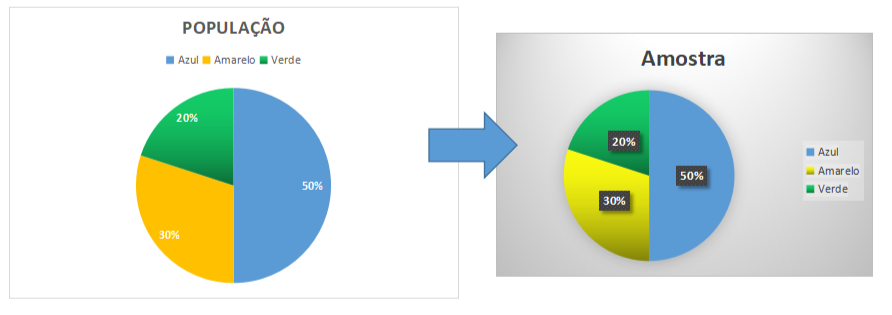

In [ ]:
#Função para estratificação dos dados
def estratificacao(dados, tamanho):
    
    #Porcentagem dos dados
    porcentagem = dados["Class"].value_counts("percentual") #Porcentagem da classe
    
    #Tamanho da estratificação
    n = int(tamanho*porcentagem[0]) #Número de dados não fraudulentos
    m = tamanho - n #Número de dados fraudulentos
    
    #Sorteando os dados para estratificação
    zeros = dados.query('Class == 0').sample(n) #Sorteando dado não fraudulento
    uns = dados.query("Class == 1").sample(m) #Sorteando dado fraudulento
    
    validacao = pd.concat([zeros,uns]) #Amostra de dados para construção do modelo
    treino = dados.drop(validacao.index) #Dataframe com dados da base onde se excluir os dados utilizados na amostra
    
    #Reoganizados os index dos dataframe
    validacao.index = range(len(validacao))
    treino.index = range(len(treino))
    
    return treino, validacao

In [ ]:
#Separação na duas bases, um para treino e outra para validação
treino, validacao = estratificacao(dados, tamanho = 10000) #Escolhendo uma quantidade de 10k de dados para validação

In [ ]:
#Quantidades de dados para treino
treino.shape

In [ ]:
#Quantidade de dados destinados para validação
validacao.shape

As "operações" de salvamento dos dados em arquivos de treino e validação no formato .csv são desnecessária sejam esses dados brutos, normalizados ou padronizados realizadas nas três celulas a seguir.

In [ ]:
#Caminho dos dados 
push = "C:\\Users\\Mickael\\OneDrive\\Projetos\\Ideias\\dados\\Fraude\\creditcard.csv"

#Salvado os dados brutos de treino e valiadação
treino.to_csv(push[:55] + "treino.csv", index = False)
validacao.to_csv(push[:55] + "validacao.csv", index = False)

In [ ]:
#Separação na duas bases os dados normalizados, um para treino e outra para validação
treino_normalizados, validacao_normalizados = estratificacao(dados, tamanho = 10000)

#Salvado os dados normalizados de treino e valiadação
treino_normalizados.to_csv(push[:55] + "treino_normalizados.csv", index = False)
validacao_normalizados.to_csv(push[:55] + "validacao_normalizados.csv", index = False)

In [ ]:
#Separação na duas bases os dados padronizados, um para treino e outra para validação
treino_padronizados, validacao_padronizados = estratificacao(dados, tamanho = 10000)

#Salvado os dados padronizados de treino e valiadação
treino_padronizados.to_csv(push[:55] + "treino_padronizados.csv", index = False)
validacao_padronizados.to_csv(push[:55] + "validacao_padronizados.csv", index = False)

# Métricas para seleção do modelo

Para avaliação do modelo utilizaremos como principal métrica a **matriz de confusão**, visto que essa matriz consite de uma tabela de frequência com os dados classificados corretamente ou incorretamente pelo modelo proposto.

*A matriz de confusão é composta por quatro elementos principais*:

>1. **Verdadeiro Positivo (VP)**: É o número de instâncias da classe positiva que foram corretamente classificadas pelo modelo.
2. **Falso Positivo (FP)**: É o número de instâncias da classe negativa que foram erroneamente classificadas como positivas pelo modelo.
3. **Verdadeiro Negativo (VN)**: É o número de instâncias da classe negativa que foram corretamente classificadas pelo modelo.
4. **Falso Negativo (FN)**: É o número de instâncias da classe positiva que foram erroneamente classificadas como negativas pelo modelo.

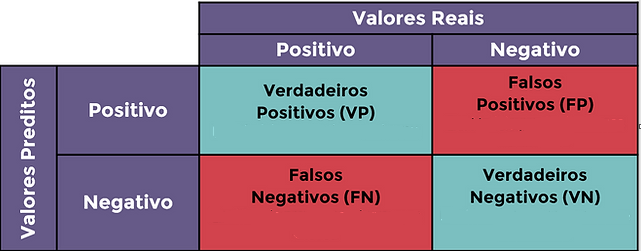

## Métricas utilizadas

Por meio da matriz de confusão utilizaremos como referência duas métricas básicas, a **sensibilidade** e **valor preditivo positivo**, iremos combinar as duas por meio de uma média harmônica, **F1 Score**, para decidimos o modelo final.

**Sensibilidade**, **recall** ou **taxa de verdadeiro positivo**
> $Sensibilidade = \dfrac{TP}{TP+FN}$

A sensibilidade consiste da razão entre a quantidade de valores que o modelo prévio como não fraudulentos pelo total de transações não fraudulentas, isso torna essa métrica muito interessante para utilizamos como classificação do modelo, quanto maior o valor da sensibilidade mais adequando e o algoritmo de decisão.

**Valor Preditivo Positivo** ou **Precisão**
> $\text{Valor Preditivo Positivo} = \dfrac{TP}{TP+FP}$

O valor preditivo positivo consiste da razão do número de valores que o modelo prévio como não fraudulento pelo total de previsões não fraudulenta do modelo, estamos básicamente análisado o percentual de acerto do modelo proposto para transações não fraudulentas, assim quanto maior o valor preditivo melhor o algoritmo de decisão.

**F1-Score** corresponde a média harmônica entre **Sensibilidade** e **Valor Preditivo Positivo**
> $\text{F1-Score} = \dfrac{2}{\dfrac{1}{\text{Sensibilidade}}+\dfrac{1}{\text{Valor Preditivo Positivo}}} = \dfrac{2\cdot\text{Sensibilidade}\cdot\text{Valor Preditivo Positivo}}{\text{Sensibilidade}+\text{Valor Preditivo Positivo}}$

Diante da consideramos nós e interessante um modelo com alta sensibilidade e valor preditivo positivo, podemos combinar essa duas métricas no F1-Score, sendo o F1-Score máximo quando a sensibilidae e valor preditivo positivo apresentam seus valores máximos, 1, por essa caracteristica selecionaremos o F1-Score como métrica definitiva para decisão final do algoritmo.

Existem diversas outras métricas para definimos ao final o modelo a se utilizado como **Especificidade (Specificity)**, **Área sob a Curva ROC (AUC-ROC)** ou **Erro Quadrático Médio (Mean Squared Error ou MSE)**, entretanto vamos nos até principalmente a **F1-Score**.

# Dados desbalanceados

Como os dados apresentados contém um desbalanceamento elevando, 99,83% da classe majoritária contra 0,17% da classe minoritária, necessitamos balaceamos os classes para algo próximo de 50% já que um alto desbalanceamento poder se o maior responsável por enviesar o modelo proposto.

Utilizaremos duas técnicas básicas para nivelamento dos dados:

>**Undersampling**: Consiste na eliminação de dados presentes na classe majoritária até que a mesma tenham uma quantidade próxima de dados a classe minoritária.  

>**Oversampling**: Consiste na adição de dados na classe minoritária até que a mesma tenham uma quantidade próxima de dados a classe majoritária. 

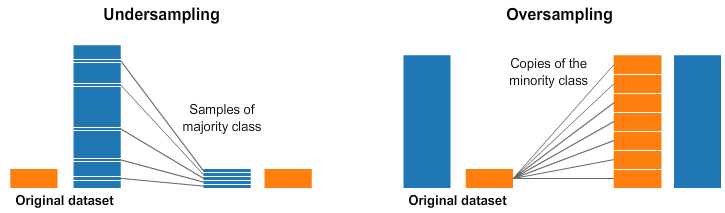    

[Link para imagem](https://miro.medium.com/v2/resize:fit:725/1*7xf9e1EaoK5n05izIFBouA.png)

## Undersampling

In [ ]:
def undersampling(dados):
    #Função gerar uma base de dados no qual a classe majoritária tenha a mesma quantidade de dados da classe minoritária
    #Sem repetição de elementos
    
    #Determinado os tamanhos de cada classes minoritária
    tamanho_classe_minoritaria = len(dados.query('Class == 1'))
    
    #Definido os tamanhos das classes minoritárias e majoritárias
    majoritaria = dados.query("Class == 0").sample(tamanho_classe_minoritaria)#Sorteando os elementos da classe majoritária
    minoritaria = dados.query("Class == 1")#Elementos da classe minoritária
    
    #Concatenação das classes em única base de dados
    undersampling = pd.concat([majoritaria,minoritaria])
    
    #Reorganizados os index do DataFrame
    undersampling.index = range(len(undersampling))
    
    return undersampling

In [ ]:
#Demostrando que as as 'class' contém a mesma quantidade de dados
undersampling(dados)['Class'].value_counts()

In [ ]:
#Demostrando que as as 'class' contém a mesma quantidade de dados
undersampling(dados)['Class'].value_counts(normalize = True)

## Oversampling

In [ ]:
def oversampling(dados):
    #Função gerar uma base de dados no qual a classe minoritária tenha a mesma quantidade de dados da classe majoritária
    #Como resultado dessa imposição a nova base de dados irar contém elementos repetição
    
    #Determinado os tamanhos de cada classes majoritária
    tamanho_classe_majoritaria = len(dados.query('Class == 0'))
    
    #Definido os tamanhos das classes minoritárias e majoritárias
    majoritaria = dados.query("Class == 0")#Elementos da classe majoritária
    #Sorteando elementos da classe minoritária
    minoritaria = dados.query("Class == 1").sample(tamanho_classe_majoritaria, replace = True)
    
    #Concatenação das classes em única base de dados
    oversampling = pd.concat([majoritaria,minoritaria])
    
    #Reorganizados os index do DataFrame
    oversampling.index = range(len(oversampling))
    
    return oversampling

In [ ]:
#Demostrando que as as 'class' contém a mesma quantidade de dados
oversampling(dados)['Class'].value_counts()

In [ ]:
#Demostrando que as as 'class' contém a mesma quantidade de dados
oversampling(dados)['Class'].value_counts(normalize = True)

Mesclado as duas funções anteriores `undersampling` e `oversamplig` para formar a função `under_over`, essa função tem como resultado um dataframe de mesmo tamanho do original, entretanto permiter controla o percentual de dados relativos a classe majoritária e minoritária.

In [ ]:
def under_over(dados, perc_majo = 0.5, perc_mino = 0.5):
    #Função gerar um base de dados do mesmo tamanho dos dados de entrada
    #Como resultado dessa imposição pode acontecer de contém elementos repetição
    
    #Determinado os tamanhos de cada classes majoritária
    tamanho_classe_majoritaria = len(dados.query('Class == 0'))
    tamanho_classe_minoritaria = len(dados.query('Class == 1'))
    
    #Tamanho do dataframe
    tamanho = tamanho_classe_majoritaria + tamanho_classe_minoritaria
    
    #Definido os tamanhos das classes minoritárias e majoritárias
    #Elementos da classe majoritária
    majoritaria = dados.query("Class == 0").sample(int(tamanho*perc_majo))
    #Sorteando elementos da classe minoritária
    minoritaria = dados.query("Class == 1").sample(int(tamanho*perc_mino), replace = True)
    
    #Concatenação das classes em única base de dados
    under_over = pd.concat([majoritaria,minoritaria])
    
    #Reorganizados os index do DataFrame
    under_over.index = range(len(under_over))
    
    return under_over
    

In [ ]:
#Demostrando que as as 'class' contém a mesma quantidade de dados
under_over(dados, perc_majo = 0.25, perc_mino = 0.75)['Class'].value_counts()

In [ ]:
#Demostrando que as as 'class' contém a mesma quantidade de dados
under_over(dados, perc_majo = 0.25, perc_mino = 0.75)['Class'].value_counts(normalize = True)

# Modelagem pelo scikit-learn

Recorrendo a [Scikit-Learn](https://scikit-learn.org/stable/index.html) biblioteca comumente utilizada para treina, desenvolver e validar modelos estatísticos e de machine learning

In [ ]:
#Importando Scikit-Learn
import sklearn

In [ ]:
print(f"Versão Sklearn: {sklearn.__version__}")

## Modelos
Entre os diversos tipos de modelos presentes na biblioteca sejam ele de classificação, o grupo de modelos que nos interessa, regressão e clusterização optamos pelos cincos mais comuns de serem utilizados

Index|Modelo
:--:|:--
1|[Regressão Logística](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
2|[Árvores de Decisão](https://scikit-learn.org/stable/modules/tree.html)
3|[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
4|[Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/svm.html#)
5|[K-Nearest Neighbors (KNN)](https://scikit-learn.org/stable/modules/neighbors.html)

# Refêrências
01.[Amostagem: Teoria e prática usado R](https://amostragemcomr.github.io/livro/index.html)  
02.[Amostragem probabilística: Amostra estratificada](https://www.netquest.com/blog/br/blog/br/amostragem-probabilistica-amostra-estratificada)  
03. [Dados Desbalanceados — O que são e como lidar com eles](https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b#:~:text=Dados%20Desbalanceados%20podem%20ser%20definidos,demais%20categorias%20(classes%20majorit%C3%A1rias).)   
04. [Paradoxo da Acurácia](https://medium.com/turing-talks/paradoxo-da-acur%C3%A1cia-56baa75334f2)  
05. [Como lidar com dados desbalanceados em problemas de classificação](https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9)  
06. [Normalizar ou Padronizar as váriaveis](https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9)  
07. [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)  
08. [No free lunch theorem](https://en.wikipedia.org/wiki/No_free_lunch_theorem)  
09. [Undersampling and Oversampling: An old and a new approach](https://medium.com/analytics-vidhya/undersampling-and-oversampling-an-old-and-a-new-approach-4f984a0e8392)  
10. [Oversampling and undersampling in data analysis](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)  
11. [Análise Exploratória de Dados](https://ealexbarros.medium.com/an%C3%A1lise-explorat%C3%B3ria-de-dados-salvando-dataframes-pandas-em-arquivos-csv-65f7bd643ece#:~:text=Para%20gerar%20esse%20arquivo%20precisamos,aparecer%C3%A1%20no%20menu%20a%20esquerda.)  
12. [Como usar o query do pandas](https://medium.com/horadecodar/como-usar-o-query-do-pandas-fdf4a00727dc)  
13. [Média Harmônica](https://pt.wikipedia.org/wiki/M%C3%A9dia_harm%C3%B4nica)  
14. [Entendendo o que é Matriz de Confusão com Python](https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509)   
15. Wilton de O. Bussab e Pedro A. Morettin. **Estatística Básica**. 6ª Edição